# Predict the customer churn of telecom company and finding out the key drivers that lead to churn


In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# set path directory
os.chdir('F:\KAGGLE\Predict Customer Churn')

# reading data files
training = pd.read_csv('Telecom_Train.csv')
testing = pd.read_csv('Telecom_Test.csv')

In [6]:
training.shape


(3333, 21)

In [7]:
# check ratio train to test data
training.shape[0]/testing.shape[0] 

1.9994001199760048

In [8]:
def get_basic_stats(dfname):
    print("\nShape of dataframe is "+str(dfname.shape))
    print("\nBelow are datatypes of columns in DF")
    print(dfname.dtypes.sort_values())
    print("\nMissing values in column")
    print(dfname.isna().sum().sort_values())
    print("\nNumber of unique values taken in a colummn")
    print(dfname.nunique().sort_values())
    print("\nrecords of data")
    print(dfname.head())

In [9]:
# basic stats testing data
get_basic_stats(testing)


Shape of dataframe is (1667, 21)

Below are datatypes of columns in DF
Unnamed: 0                         int64
account_length                     int64
total_intl_calls                   int64
number_vmail_messages              int64
total_night_calls                  int64
total_day_calls                    int64
number_customer_service_calls      int64
total_eve_calls                    int64
total_intl_charge                float64
total_intl_minutes               float64
total_night_charge               float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_eve_charge                 float64
voice_mail_plan                   object
international_plan                object
area_code                         object
state                             object
churn                             object
dtype: object

Missing values in column
Unnamed: 0                 

In [10]:
# basic stats training
get_basic_stats(training)


Shape of dataframe is (3333, 21)

Below are datatypes of columns in DF
Unnamed: 0                         int64
account_length                     int64
total_intl_calls                   int64
number_vmail_messages              int64
total_night_calls                  int64
total_day_calls                    int64
number_customer_service_calls      int64
total_eve_calls                    int64
total_intl_charge                float64
total_intl_minutes               float64
total_night_charge               float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_eve_charge                 float64
voice_mail_plan                   object
international_plan                object
area_code                         object
state                             object
churn                             object
dtype: object

Missing values in column
Unnamed: 0                 

In [11]:
# make a copy of data to keep its originality
training2 = training.copy()
testing2 = testing.copy()

In [12]:
# removed unusable column
training2 = training2.drop('Unnamed: 0', axis=1)
testing2 = testing2.drop('Unnamed: 0', axis=1)
training2.shape

(3333, 20)

In [13]:
def cat_to_binary(df, varname):
    df[varname +'_num'] = df[varname].apply(lambda x: 1 if x=='yes' else 0)
    print("\nchecking")
    print(df.groupby([varname +'_num', varname]).size())
    return df

In [14]:
convert_list = ['churn','international_plan', 'voice_mail_plan']

In [15]:
for varname in convert_list:
    training2 = cat_to_binary(training2, varname)
    testing2 = cat_to_binary(testing2, varname)



checking
churn_num  churn
0          no       2850
1          yes       483
dtype: int64

checking
churn_num  churn
0          no       1443
1          yes       224
dtype: int64

checking
international_plan_num  international_plan
0                       no                    3010
1                       yes                    323
dtype: int64

checking
international_plan_num  international_plan
0                       no                    1517
1                       yes                    150
dtype: int64

checking
voice_mail_plan_num  voice_mail_plan
0                    no                 2411
1                    yes                 922
dtype: int64

checking
voice_mail_plan_num  voice_mail_plan
0                    no                 1266
1                    yes                 401
dtype: int64


In [16]:
#univariate analysis - NON continuous variables
import matplotlib.pyplot as plt
import seaborn as sns

(array([1655.,    0.,    0.,    0.,    0.,  838.,    0.,    0.,    0.,
         840.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

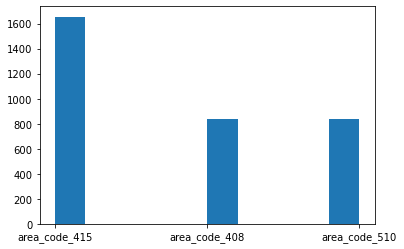

In [17]:
plt.hist(list(training2['area_code']))

(array([ 70.,   0.,  78.,   0.,  68.,   0.,  61.,   0.,  80.,   0.,  65.,
          0.,  63.,   0.,  51.,   0., 106.,   0.,  71.,   0.,  65.,   0.,
         44.,   0.,  68.,   0.,  83.,   0.,  73.,   0.,  73.,   0.,  77.,
          0.,  72.,   0.,  63.,   0.,  66.,   0.,  64.,   0.,  60.,   0.,
         61.,   0.,  77.,   0.,  53.,   0.,  58.,   0.,  56.,   0.,  54.,
          0.,  52.,   0.,  70.,   0.,  55.,   0.,  78.,   0.,  78.,   0.,
         73.,   0.,  61.,   0.,  72.,   0.,  34.,   0.,  84.,   0.,  60.,
          0.,  68.,   0.,  66.,   0.,  62.,   0.,  66.,   0.,  54.,   0.,
         59.,   0.,  62.,   0.,  65.,   0.,  53.,   0.,  45.,   0.,  74.,
         62.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
        22. , 22.5, 23

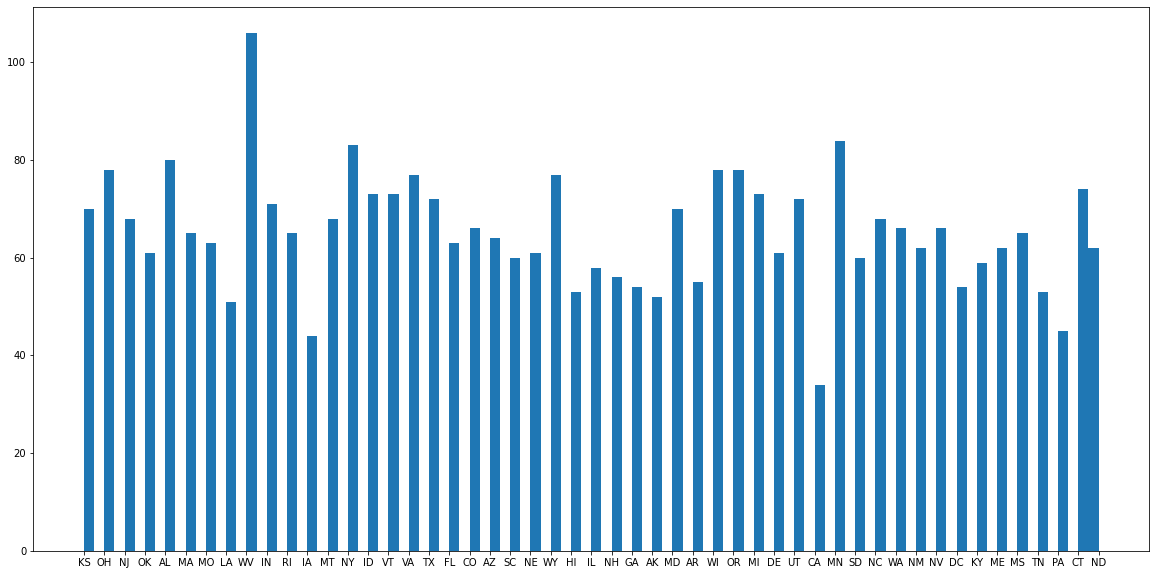

In [18]:
plt.figure(figsize=(20,10))
plt.hist(list(training2['state']),bins =100)

In [19]:
training2.mean()

account_length                   101.064806
number_vmail_messages              8.099010
total_day_minutes                179.775098
total_day_calls                  100.435644
total_day_charge                  30.562307
total_eve_minutes                200.980348
total_eve_calls                  100.114311
total_eve_charge                  17.083540
total_night_minutes              200.872037
total_night_calls                100.107711
total_night_charge                 9.039325
total_intl_minutes                10.237294
total_intl_calls                   4.479448
total_intl_charge                  2.764581
number_customer_service_calls      1.562856
churn_num                          0.144914
international_plan_num             0.096910
voice_mail_plan_num                0.276628
dtype: float64

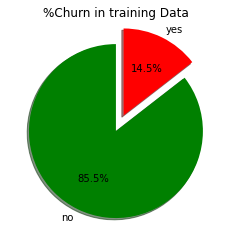

In [20]:
#visualising the churn variable
topie = training['churn'].value_counts(sort=True)
colorss = ["green","red"]
plt.pie(topie,labels = topie.index.values, explode=[0,0.2], colors=colorss, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('%Churn in training Data')
plt.show()

In [21]:
# univariate analysis - continuous variables
continuous_vars = training2.select_dtypes([np.number]).columns.tolist()
continuous_vars

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churn_num',
 'international_plan_num',
 'voice_mail_plan_num']

In [22]:
continuous_vars = [x for x in continuous_vars if '_num' not in x]

In [26]:
calls_vars = [x for x in continuous_vars if 'calls' in x]
calls_vars

['total_day_calls',
 'total_eve_calls',
 'total_night_calls',
 'total_intl_calls',
 'number_customer_service_calls']

<AxesSubplot:>

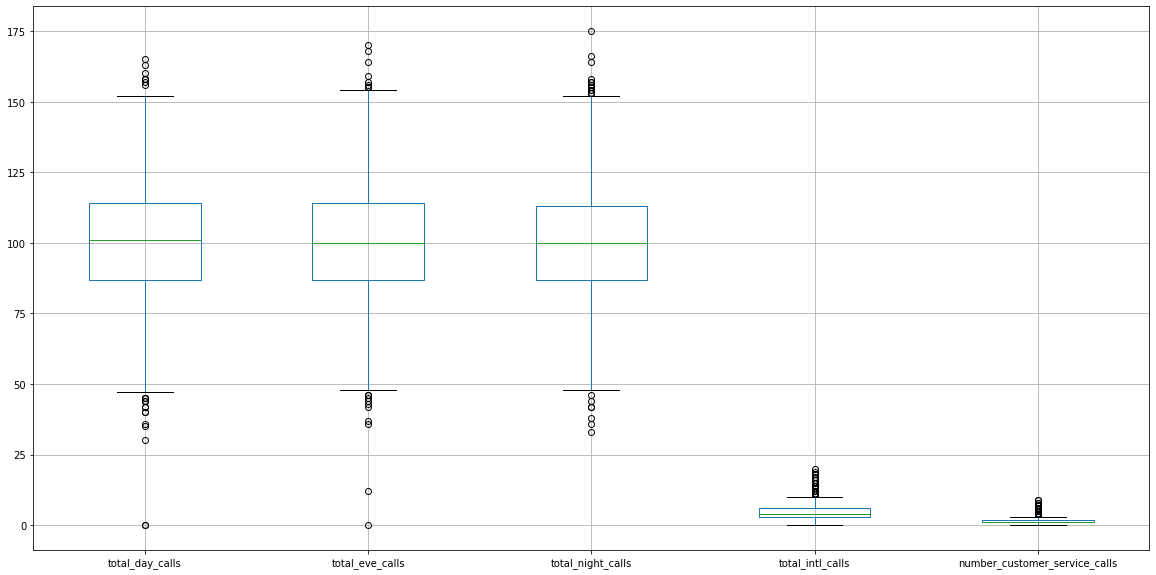

In [27]:
training2.boxplot(column=calls_vars, figsize=(20,10))


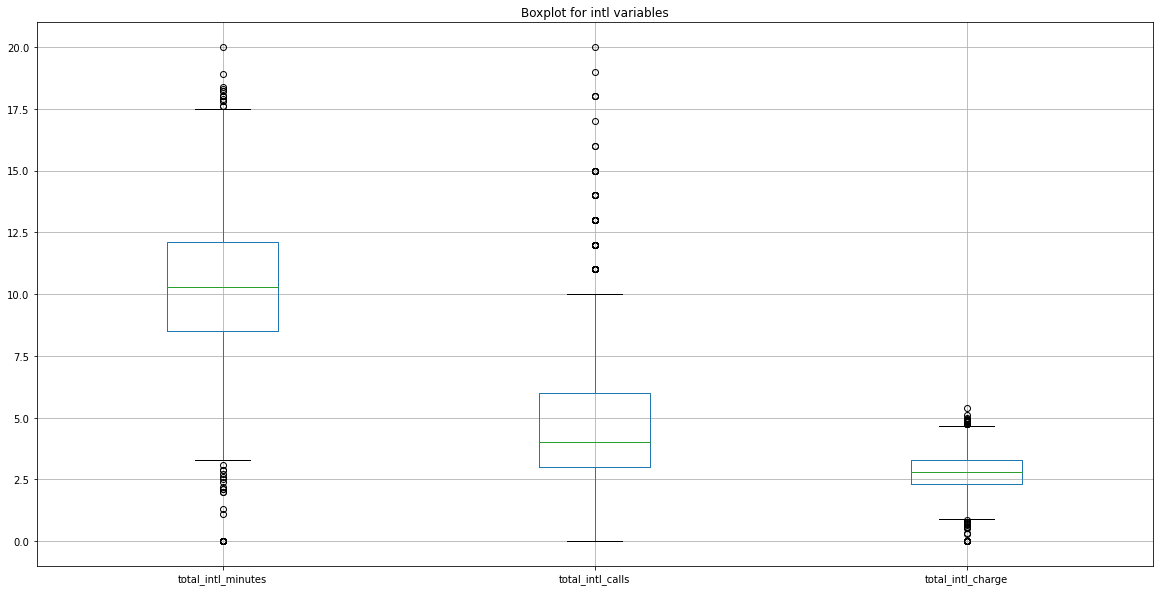

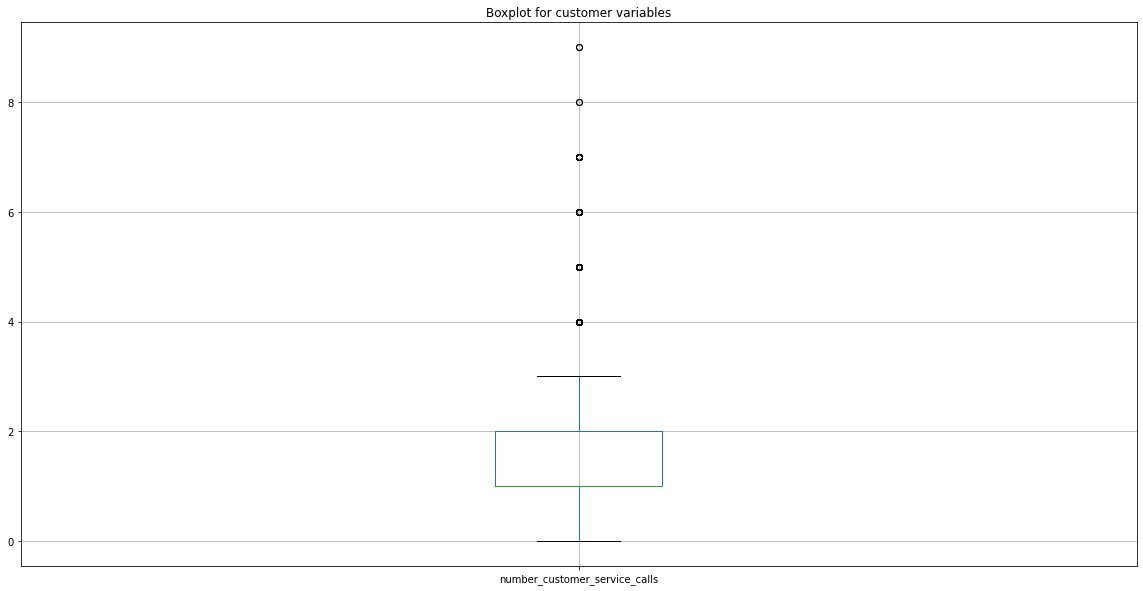

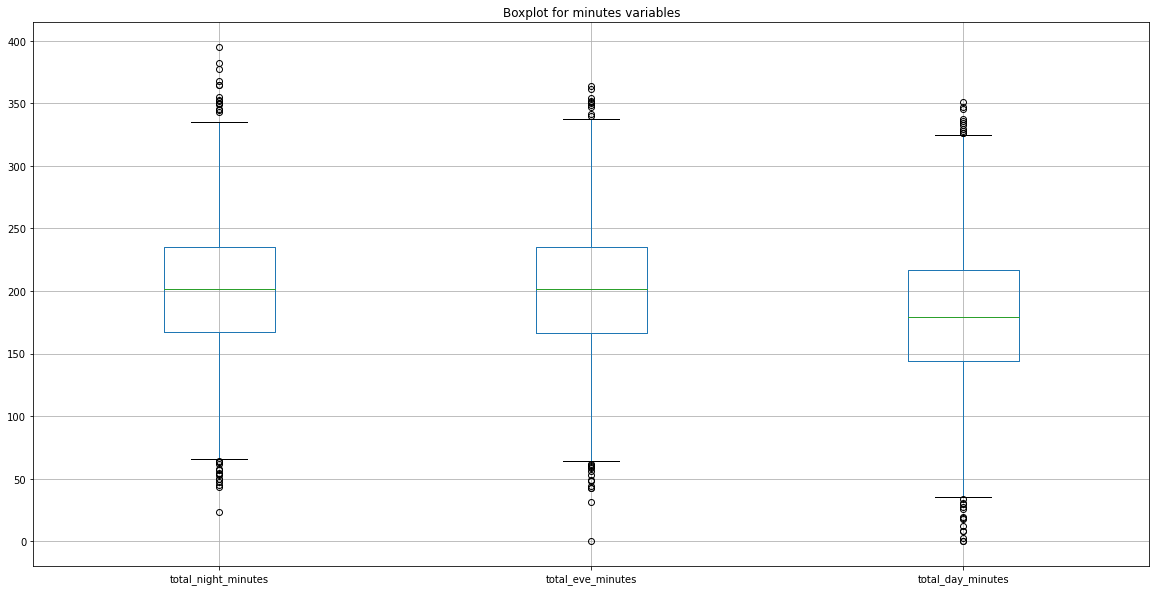

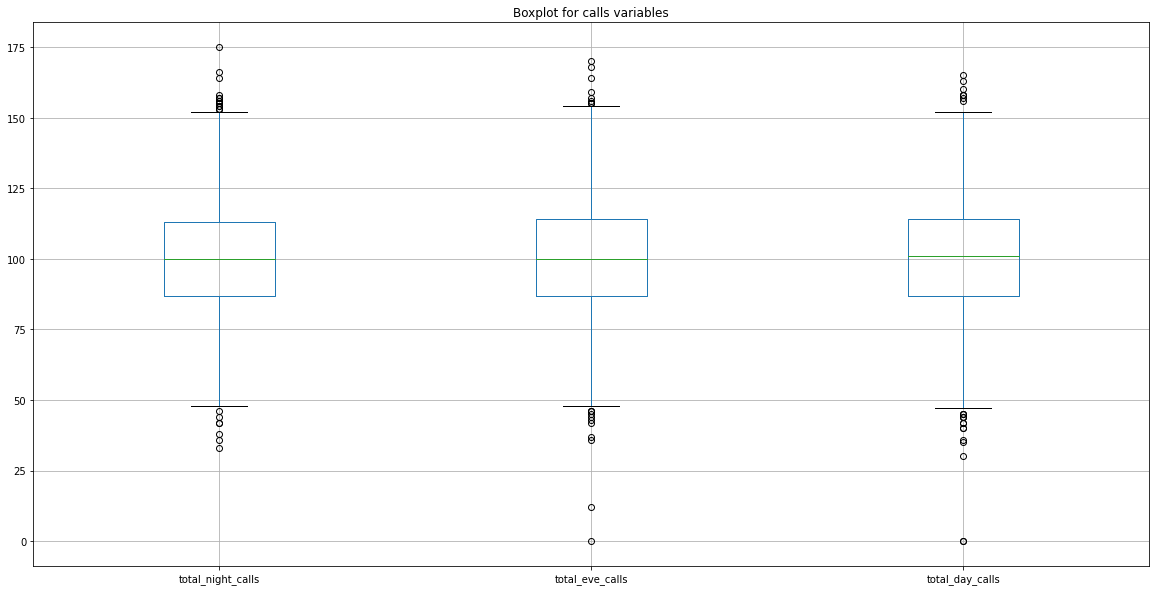

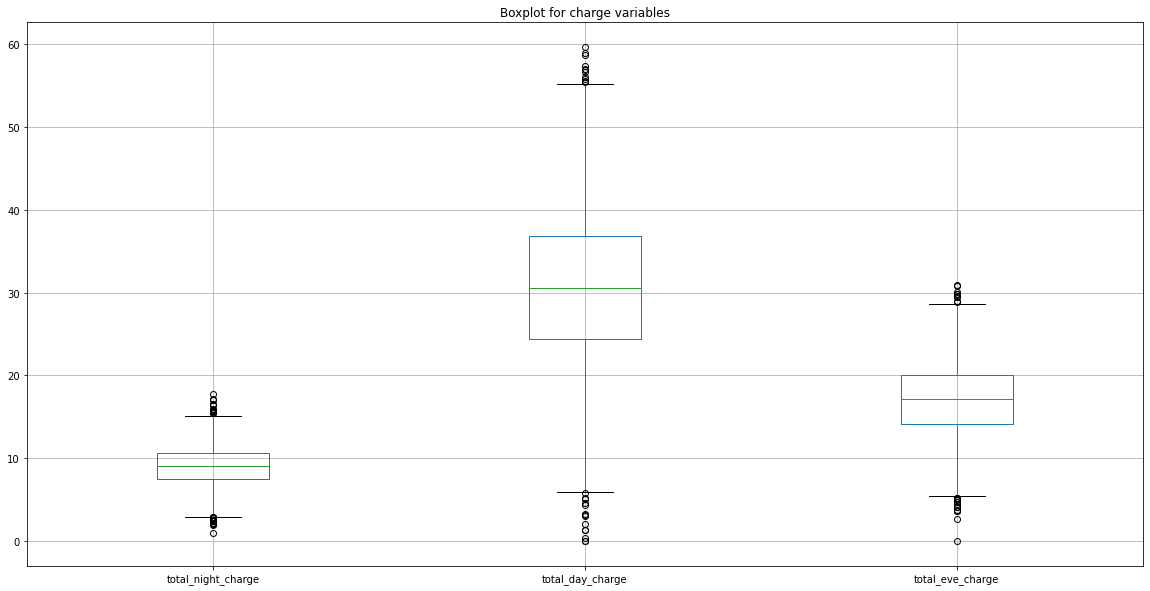

In [31]:
type_of_vars = ['intl','customer','minutes','calls','charge']
remaining_list = training2.columns
for vartype in type_of_vars:
    temp_list = [x for x in remaining_list if vartype in x]
    remaining_list = list(set(remaining_list).difference(set(temp_list)))
    training2.boxplot(column=temp_list, figsize=(20,10))
    plt.title('Boxplot for ' +vartype+ ' variables')
    plt.show()

In [32]:
# Bivariate Analysis 
X = training2.drop('churn_num', axis=1)

In [34]:
X.corr().unstack().reset_index()

,level_0,level_1,0
0,account_length,account_length,1.000000
1,account_length,number_vmail_messages,-0.004628
2,account_length,total_day_minutes,0.006216
3,account_length,total_day_calls,0.038470
4,account_length,total_day_charge,0.006214
...,...,...,...
284,voice_mail_plan_num,total_intl_calls,0.007618
285,voice_mail_plan_num,total_intl_charge,-0.001276
286,voice_mail_plan_num,number_customer_service_calls,-0.017824
287,voice_mail_plan_num,international_plan_num,0.006006


In [38]:
all_corr = X.corr().unstack().reset_index()
corr_table = all_corr[all_corr['level_0'] > all_corr['level_1']]
corr_table.columns = ['var1', 'var2', 'corr_value']
corr_table['corr_abs'] = corr_table['corr_value'].abs()
corr_table = corr_table.sort_values(by=['corr_abs'],ascending=False)

<ipython-input-38-bf4bb5020349>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_table['corr_abs'] = corr_table['corr_value'].abs()


In [39]:
corr_table.head(10)

,var1,var2,corr_value,corr_abs
38,total_day_minutes,total_day_charge,1.000000,1.000000
92,total_eve_minutes,total_eve_charge,1.000000,1.000000
146,total_night_minutes,total_night_charge,0.999999,0.999999
200,total_intl_minutes,total_intl_charge,0.999993,0.999993
273,voice_mail_plan_num,number_vmail_messages,0.956927,0.956927
83,total_day_charge,international_plan_num,0.049398,0.049398
49,total_day_minutes,international_plan_num,0.049396,0.049396
202,total_intl_minutes,international_plan_num,0.045871,0.045871
236,total_intl_charge,international_plan_num,0.045780,0.045780
51,total_day_calls,account_length,0.038470,0.038470
